## رگرسیون خطی و چندجمله‌ای برای قیمت‌گذاری کدو تنبل - درس ۳

کتابخانه‌های مورد نیاز و مجموعه داده را بارگذاری کنید. داده‌ها را به یک دیتافریم تبدیل کنید که شامل زیرمجموعه‌ای از داده‌ها باشد:

- فقط کدو تنبل‌هایی را انتخاب کنید که به صورت بوشل قیمت‌گذاری شده‌اند  
- تاریخ را به ماه تبدیل کنید  
- قیمت را به صورت میانگین قیمت‌های بالا و پایین محاسبه کنید  
- قیمت را به گونه‌ای تبدیل کنید که منعکس‌کننده قیمت‌گذاری بر اساس مقدار بوشل باشد  


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

یک نمودار پراکندگی به ما یادآوری می‌کند که فقط داده‌های ماه از آگوست تا دسامبر را داریم. احتمالاً به داده‌های بیشتری نیاز داریم تا بتوانیم به صورت خطی نتیجه‌گیری کنیم.


<AxesSubplot:xlabel='Month', ylabel='Price'>

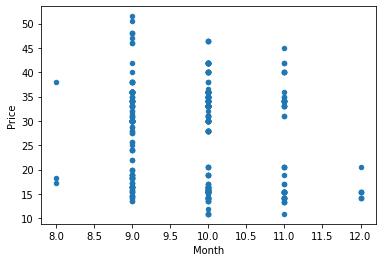

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

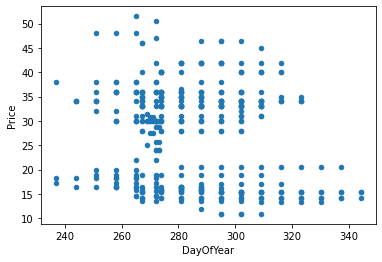

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

بیایید ببینیم آیا همبستگی وجود دارد:


In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


به نظر می‌رسد همبستگی بسیار کم است، اما یک رابطه مهم‌تر دیگری وجود دارد - زیرا نقاط قیمت در نمودار بالا به نظر می‌رسد چندین خوشه متمایز دارند. بیایید نموداری بسازیم که انواع مختلف کدو تنبل را نشان دهد:


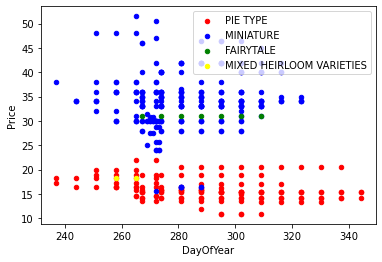

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

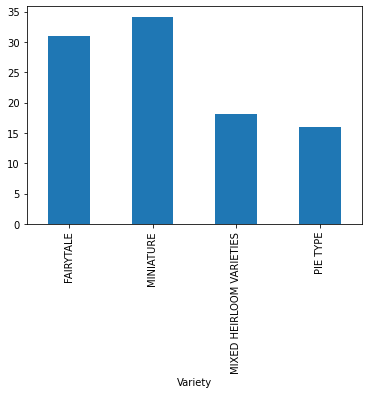

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

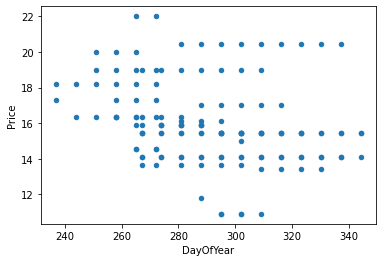

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### رگرسیون خطی

ما از Scikit Learn برای آموزش مدل رگرسیون خطی استفاده خواهیم کرد:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


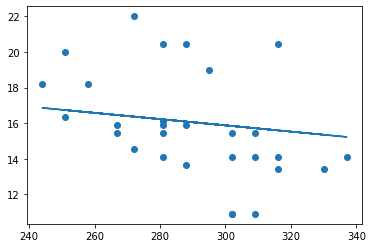

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

شیب خط را می‌توان از ضرایب رگرسیون خطی تعیین کرد:


In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

می‌توانیم از مدل آموزش‌دیده برای پیش‌بینی قیمت استفاده کنیم:


In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### رگرسیون چندجمله‌ای

گاهی اوقات رابطه بین ویژگی‌ها و نتایج ذاتاً غیرخطی است. برای مثال، قیمت کدو تنبل ممکن است در زمستان (ماه‌های ۱ و ۲) بالا باشد، سپس در تابستان (ماه‌های ۵ تا ۷) کاهش یابد و دوباره افزایش پیدا کند. رگرسیون خطی نمی‌تواند این رابطه را به‌درستی پیدا کند.

در این حالت، می‌توانیم اضافه کردن ویژگی‌های اضافی را در نظر بگیریم. یک روش ساده استفاده از چندجمله‌ای‌ها بر اساس ویژگی‌های ورودی است که منجر به **رگرسیون چندجمله‌ای** می‌شود. در Scikit Learn، می‌توانیم به‌صورت خودکار ویژگی‌های چندجمله‌ای را با استفاده از پایپ‌لاین‌ها پیش‌محاسبه کنیم:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


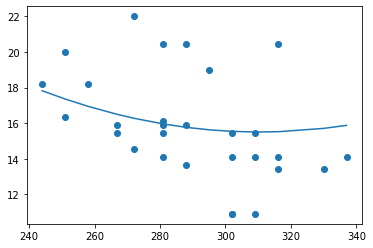

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### انواع کدگذاری

در دنیای ایده‌آل، می‌خواهیم بتوانیم قیمت‌های انواع مختلف کدو تنبل را با استفاده از یک مدل پیش‌بینی کنیم. برای در نظر گرفتن نوع کدو، ابتدا باید آن را به شکل عددی تبدیل کنیم، یا به عبارت دیگر **کدگذاری** کنیم. چند روش برای انجام این کار وجود دارد:

* کدگذاری عددی ساده که یک جدول از انواع مختلف ایجاد می‌کند و سپس نام نوع را با یک شاخص در آن جدول جایگزین می‌کند. این روش برای رگرسیون خطی بهترین انتخاب نیست، زیرا رگرسیون خطی مقدار عددی شاخص را در نظر می‌گیرد و احتمالاً مقدار عددی با قیمت به صورت عددی همبستگی ندارد.
* کدگذاری یک‌داغ (One-hot encoding)، که ستون `Variety` را با ۴ ستون مختلف جایگزین می‌کند، یکی برای هر نوع، که اگر ردیف مربوط به نوع خاصی باشد مقدار ۱ و در غیر این صورت مقدار ۰ خواهد داشت.

کد زیر نشان می‌دهد که چگونه می‌توان یک نوع را به صورت یک‌داغ کدگذاری کرد:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### رگرسیون خطی بر روی انواع مختلف

اکنون از همان کدی که در بالا استفاده کردیم بهره می‌بریم، اما به جای `DayOfYear` از نوع‌های کدگذاری‌شده به صورت یک‌-داغ به عنوان ورودی استفاده خواهیم کرد:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


ما می‌توانیم به همین روش از ویژگی‌های دیگر نیز استفاده کنیم و آن‌ها را با ویژگی‌های عددی مانند `Month` یا `DayOfYear` ترکیب کنیم:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### رگرسیون چندجمله‌ای

رگرسیون چندجمله‌ای می‌تواند برای ویژگی‌های دسته‌بندی‌شده که به صورت یک-داغ کدگذاری شده‌اند نیز استفاده شود. کدی که برای آموزش رگرسیون چندجمله‌ای استفاده می‌شود اساساً مشابه چیزی است که در بالا مشاهده کردیم.


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه حرفه‌ای انسانی استفاده کنید. ما مسئولیتی در قبال سوء تفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
